In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [47]:
# importing the dataset
dataset = pd.read_csv('heartFailure_dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

"""
SEX: male=1, female=0
DEATH_EVENT: 0=death, 1=survived
SMOKING: 0=No, 1=Yes
"""

'\nSEX: male=1, female=0\nDEATH_EVENT: 0=death, 1=survived\nSMOKING: 0=No, 1=Yes\n'

In [37]:
# spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123)

Text(0.5, 1.0, 'Actual outcomes vs prediction outcomes')

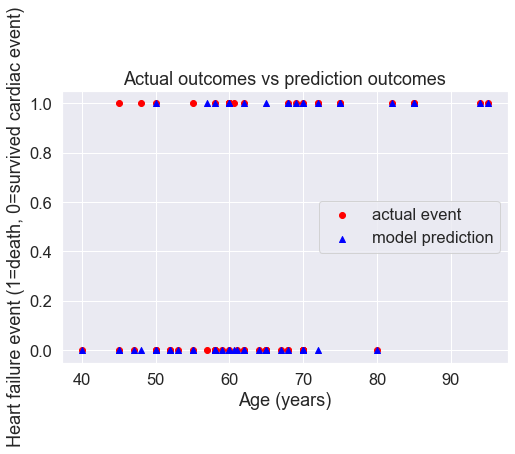

In [38]:
# Model selection, training, and prediction

model = LogisticRegression()
trained_model = model.fit(X_train, y_train)

plt.figure(1, figsize=(8, 5))
plt.scatter(X_test[:, 0], y_test, c='red', label="actual event")
plt.scatter(X_test[:, 0], trained_model.predict(X_test), 
            c='blue', marker='^', label="model prediction")
plt.legend()
plt.xlabel('Age (years)')
plt.ylabel('Heart failure event (1=death, 0=survived cardiac event)')
plt.title("Actual outcomes vs prediction outcomes")

Text(0.5, 1.0, 'Probability of Survival Based on Clinical features')

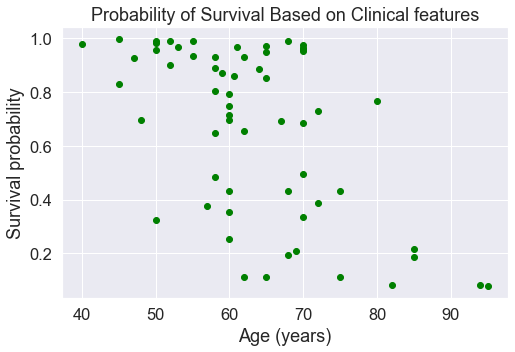

In [39]:
# Given age what is the probability of survival
plt.figure(2, figsize=(8, 5))
plt.scatter(X_test[:, 0], trained_model.predict_proba(X_test)[:, 0], c="green")
plt.xlabel("Age (years)")
plt.ylabel("Survival probability")
plt.title("Probability of Survival Based on Clinical features")

[[ 5.12714952e-02  2.20908417e-04  4.44769461e-05  6.42703557e-05
  -7.10778103e-02  3.73659357e-04 -1.04728632e-06  5.92826321e-03
   8.09226274e-03 -3.76536921e-04 -8.45040335e-04 -2.05219538e-02]]


Text(0.5, 1.0, 'Visualization of feature coefficients')

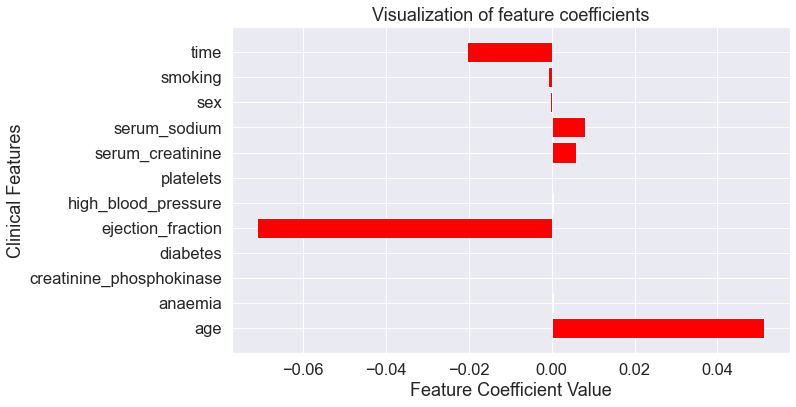

In [40]:
# Visualization of feature coefficients 

featureNames = list(dataset.columns)
featureNames.remove("DEATH_EVENT")
modelCoefs = np.asarray(trained_model.coef_)
print(modelCoefs)

plt.figure(figsize=(10, 6))
plt.barh(featureNames, modelCoefs[0], color="red")
plt.ylabel("Clinical Features")
plt.xlabel("Feature Coefficient Value")
plt.title("Visualization of feature coefficients")


/usr/local/lib/python3.9/site-packages/seaborn/matrix.py:255: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(x, y, annotation, **text_kwargs)


Text(25.499999999999993, 0.5, 'Actual Outcome')

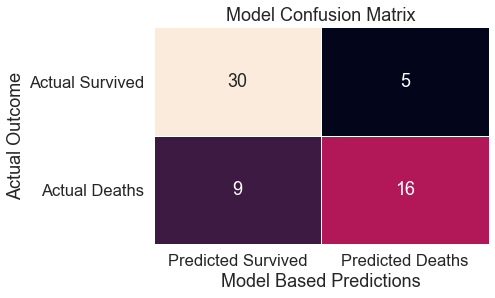

In [41]:
# Plot of Confusion matrix | rates of True Positives, False Positives, 
# False Negatives, and True Negatives

conf_mat = confusion_matrix(y_test, trained_model.predict(X_test))

df_cm = pd.DataFrame(conf_mat, range(2), range(2))
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True, annot_kws={"Size": 18}, 
           yticklabels=["Actual Survived", "Actual Deaths"], 
           xticklabels=["Predicted Survived", "Predicted Deaths"],
           cbar=False, linewidth=1)
plt.title("Model Confusion Matrix")
plt.xlabel("Model Based Predictions")
plt.ylabel("Actual Outcome")

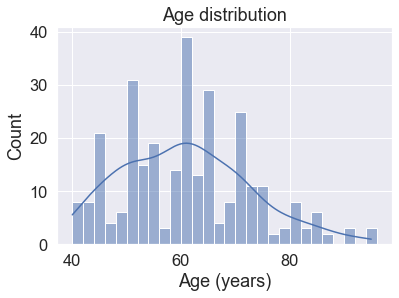

In [42]:
# Visualizing the dataset
sn.histplot(X[:, 0], binwidth=2, kde=True)
plt.xlabel("Age (years)")
plt.title("Age distribution")
plt.show()

([<matplotlib.patches.Wedge at 0x12b2e4f10>,
 [Text(1.5458293030159544, 0.5769850656102017, 'Female deaths'),
  Text(0.1816646550070459, 1.639968887851587, 'Female Survived'),
  Text(-1.5840485824201038, 0.4618333991093114, 'Male Deaths'),
  Text(0.30168297642920294, -1.6221859886378065, 'Male Survived')],
 [Text(0.843179619826884, 0.3147191266964736, '11.37%'),
  Text(0.09908981182202502, 0.8945284842826837, '23.75%'),
  Text(-0.8640264995018746, 0.2519091267868971, '20.74%'),
  Text(0.1645543507795652, -0.884828721075167, '44.15%')])

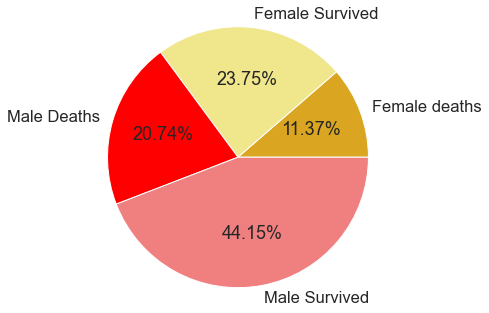

In [43]:
# Visualizing the Dataset: Gender differences (male==1; female==0)
# Death event: 

# Survival and Death rates based on gender
female = dataset[dataset["sex"]==0]
male = dataset[dataset["sex"]==1]

female_surv = female[female["DEATH_EVENT"]==0]
female_deaths = female[female["DEATH_EVENT"]==1]

male_surv = male[male["DEATH_EVENT"]==0]
male_deaths = male[male["DEATH_EVENT"]==1]

pie_data = [len(female_deaths), len(female_surv), len(male_deaths),
            len(male_surv)]
plt.pie(pie_data, 
        labels=["Female deaths", "Female Survived", 
                "Male Deaths", "Male Survived"], 
        colors=["goldenrod", "khaki", "red", "lightcoral"], radius=1.5,
        autopct="%1.2f%%")

<AxesSubplot:>

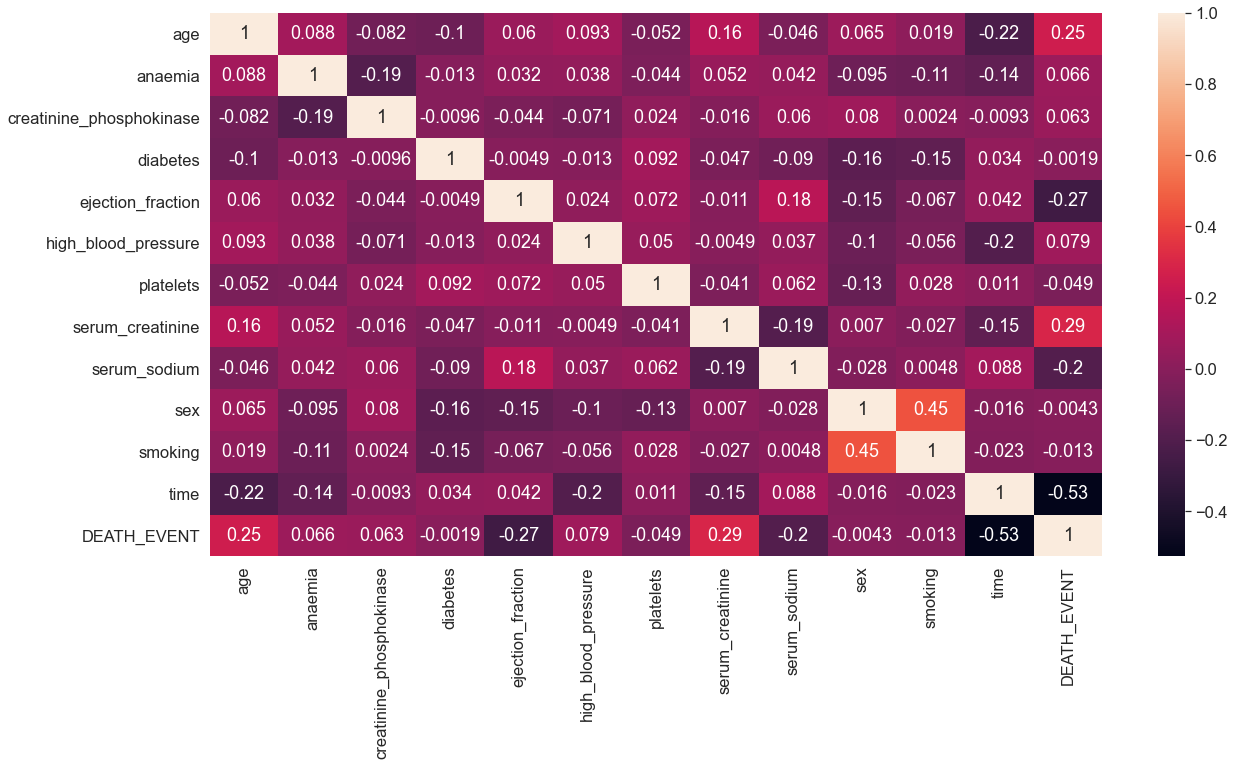

In [48]:
# Correlation coefficients between featuer varibales

plt.figure(figsize=(20, 10))
sn.heatmap(data=dataset.corr(), annot=True)

/var/folders/rq/bbyplcq532ng9q84wtscrgyw0000gn/T/ipykernel_39433/543354162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset["sex"][new_dataset["sex"]==1] = "Male"
/var/folders/rq/bbyplcq532ng9q84wtscrgyw0000gn/T/ipykernel_39433/543354162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset["sex"][new_dataset["sex"]==0] = "Female"
/var/folders/rq/bbyplcq532ng9q84wtscrgyw0000gn/T/ipykernel_39433/543354162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

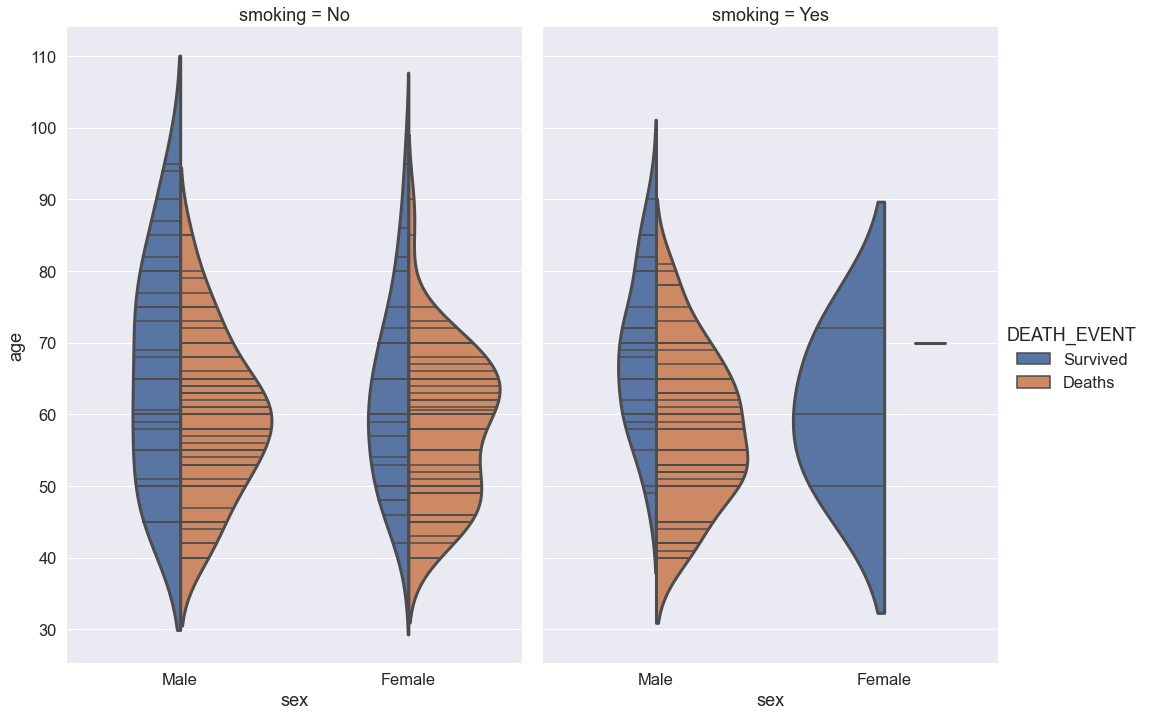

In [45]:
""" 
Consider getting rid of violin plot completely
"""

# Visualizing the dataset: Age and smoking 

new_dataset = dataset
new_dataset["sex"][new_dataset["sex"]==1] = "Male"
new_dataset["sex"][new_dataset["sex"]==0] = "Female"
new_dataset["smoking"][new_dataset["smoking"]==1] = "Yes"
new_dataset["smoking"][new_dataset["smoking"]==0] = "No"
new_dataset["DEATH_EVENT"][new_dataset["DEATH_EVENT"]==1] = "Survived"
new_dataset["DEATH_EVENT"][new_dataset["DEATH_EVENT"]==0] = "Deaths"
 
sn.catplot(x="sex", y="age", hue="DEATH_EVENT", col="smoking",
           data=new_dataset, kind="violin", split=True, height=10, aspect=.7,
           linewidth=3, scale="count", inner="stick")